In [1]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-u

train feature shape : (55000, 784)   train feature dtype : float32
train Label   shape : (55000,)       train Label   dtype : uint8
test  feature shape : (10000, 784)   test feature dtype : float32
test  Label   shape : (10000,)       test  Label   dtype : uint8
vali  feature shape : (5000, 784)   vali feature dtype : float32
vali  Label   shape : (5000,)       vali  Label   dtype : uint8


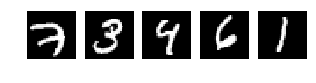

In [16]:
print('train feature shape : {}   train feature dtype : {}'.format(mnist.train.images.shape, mnist.train.images.dtype))
print('train Label   shape : {}       train Label   dtype : {}'.format(mnist.train.labels.shape, mnist.train.labels.dtype))
print('test  feature shape : {}   test feature dtype : {}'.format(mnist.test.images.shape, mnist.test.images.dtype))
print('test  Label   shape : {}       test  Label   dtype : {}'.format(mnist.test.labels.shape, mnist.test.labels.dtype))
print('vali  feature shape : {}   vali feature dtype : {}'.format(mnist.validation.images.shape, mnist.validation.images.dtype))
print('vali  Label   shape : {}       vali  Label   dtype : {}'.format(mnist.validation.labels.shape, mnist.validation.labels.dtype))

train_data_length = mnist.train.images.shape[0]
test_data_length = mnist.test.images.shape[0]

nums= mnist.train.images[0:10]       
plt.figure(figsize = (5,1))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(np.reshape(nums[i],(28,28)),cmap='gray')

In [37]:
label1 = mnist.train.labels[:10]
label2 = mnist.train.labels[10:20]
label1_bytes= label1.tostring()
label2_bytes= label2.tostring()
print('{} dtype:{}'.format(label1, label1.dtype))
print('{} dtype:{}'.format(label2, label2.dtype))

[7 3 4 6 1 8 1 0 9 8] dtype:uint8
[0 3 1 2 7 0 2 9 6 0] dtype:uint8



In [65]:
image1 = mnist.train.images[:10]
image2 = mnist.train.images[10:20]
image1_bytes= image1.tostring()
image2_bytes= image2.tostring()
image_cnt = image1.shape[0]
image_width = 28
image_height = 28
print('{} dtype:{}'.format(image1.shape, image1.dtype))
print('{} dtype:{}'.format(image2.shape, image2.dtype))
print('count:{}   width:{}   height:{}'.format(image_cnt, image_width, image_height))

(10, 784) dtype:float32
(10, 784) dtype:float32
count:10   width:28   height:28


In [106]:
example = tf.train.Example(features=tf.train.Features(feature={
 'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label1_bytes])),
 'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image1_bytes])),
 'cnt': tf.train.Feature(int64_list=tf.train.Int64List(value=[image_cnt])), 
 'width': tf.train.Feature(int64_list=tf.train.Int64List(value=[image_width])), 
 'height': tf.train.Feature(int64_list=tf.train.Int64List(value=[image_height])), 
 }))
print(tf.train.BytesList(value=[label1_bytes]))
print(tf.train.Int64List(value=[image_cnt]))
#print(tf.train.BytesList(value=[image1_bytes]))
#print(tf.train.Feature(bytes_list=tf.train.BytesList(value=[label1_bytes])))
#print(tf.train.Features(feature={'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image1_bytes]))}))
#print(example)
#print(example.SerializeToString())

value: "\007\003\004\006\001\010\001\000\t\010"

value: 10



In [104]:
label = (example.features.feature['label'].bytes_list.value[0])
image = (example.features.feature['image'].bytes_list.value[0])
cnt = int(example.features.feature['cnt'].int64_list.value[0])
width = int(example.features.feature['width'].int64_list.value[0])
height = int(example.features.feature['height'].int64_list.value[0])


In [102]:
label, cnt, width, height

(b'\x07\x03\x04\x06\x01\x08\x01\x00\t\x08', 10, 28, 28)

# tostring에 대해서 알아보자

In [98]:
x1 = np.array([1,2], np.uint8)
x2 = np.array([1,2], np.uint16)
x3 = np.array([1,2], np.uint32)
x4 = np.array([1,2], np.uint64)
print('np.uint8 => tostring result : {}'.format(x1.tostring()))
print('np.uint16 => tostring result : {}'.format(x2.tostring()))
print('np.uint32 => tostring result : {}'.format(x3.tostring()))
print('np.uint64 => tostring result : {}'.format(x4.tostring()))

np.uint8 => tostring result : b'\x01\x02'
np.uint16 => tostring result : b'\x01\x00\x02\x00'
np.uint32 => tostring result : b'\x01\x00\x00\x00\x02\x00\x00\x00'
np.uint64 => tostring result : b'\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00'


In [112]:
x1 = np.array([1,2], np.uint8)
x2 = np.array([513], np.uint16)
print('np.uint8  => tostring result : {}'.format(x1.tostring()))
print('np.uint16 => tostring result : {}'.format(x2.tostring()))

#for i in range(1000):
#    print(i, "|", np.array([i], np.uint16).tostring())

np.uint8  => tostring result : b'\x01\x02'
np.uint16 => tostring result : b'\x01\x02'


# DataFrame으로 넣고 데이터 직관적으로 확인하기

In [17]:
import pandas as pd
a = data_set.images[0].reshape(28,28)
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,84,185,159,151,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,222,254,254,254,...,198,198,170,52,0,0,0,0,0,0
9,0,0,0,0,0,0,67,114,72,114,...,229,254,254,140,0,0,0,0,0,0


In [18]:
data_set.images[0]
data_set_df_pre = data_set.images[0].reshape(28,28)
data_set_df = pd.DataFrame(data_set_df_pre)
data_set_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,84,185,159,151,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,222,254,254,254,...,198,198,170,52,0,0,0,0,0,0
9,0,0,0,0,0,0,67,114,72,114,...,229,254,254,140,0,0,0,0,0,0


In [291]:
# 이진 형태로 저장된 파일에서 1건씩 불러오는 과정
filename = os.path.join(save_dir_TFRecord_01, 'validation.tfrecords')
record_iterator = tf.python_io.tf_record_iterator(filename)
seralized_img_example = next(record_iterator)

In [28]:
filename = os.path.join(save_dir_TFRecord_01, 'validation.tfrecords')
record_iterator = tf.python_io.tf_record_iterator(filename)
# 다음 Record 불러옴.
seralized_img_example = next(record_iterator)

In [34]:
example = tf.train.Example()
example.ParseFromString(seralized_img_example)
image = example.features.feature['image_raw'].bytes_list.value
label = example.features.feature['label'].int64_list.value[0]
width = example.features.feature['width'].int64_list.value[0]
height = example.features.feature['height'].int64_list.value[0]
print(label, width, height)

7 28 28


In [ ]:
# 내부 구조 확인하기
example

In [59]:
img_flat = np.fromstring(image[0], dtype=np.uint8)
img_reshaped = img_flat.reshape((28, 28, -1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


In [60]:
img_reshaped.shape

(28, 28, 1)

In [292]:
print('type : {}\nshape : {}'.format(type(img_flat), img_flat.shape))
print('{} '.format(img_flat, img_reshaped))

type : <class 'numpy.ndarray'>
shape : (784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 